# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# CSV FILE SELECTION

In [2]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()


# DATA LOADING AND PREPROCESSING

In [3]:
# Load the dataset
data = pd.read_csv(file_path)


# Drop the Story_ID column (non-numeric data)
X = data.drop(columns=["Story_ID"])

# SCATTER PLOT FOR INITILA DATA VISUALIZATION, (Before Clustering)

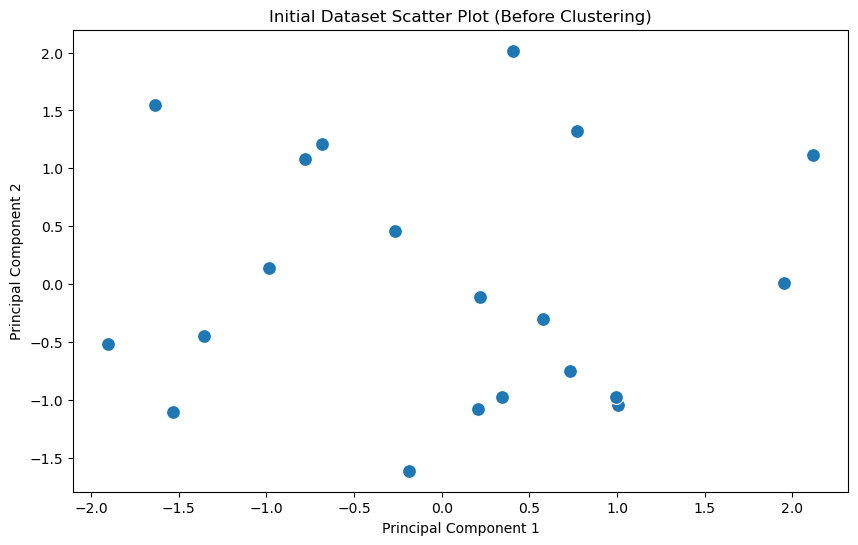

In [4]:
# Scatter plot of the dataset (initial visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=100)
plt.title("Initial Dataset Scatter Plot (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# WARDS METHOD

In [5]:
# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method="ward")

# Define the number of clusters and extract cluster labels
num_clusters = 5  # Adjust as needed
labels = fcluster(linkage_matrix, num_clusters, criterion="maxclust")

# Add cluster labels to the dataset
data["Cluster"] = labels

# SCATTER PLOT AFTER CLUSTERING

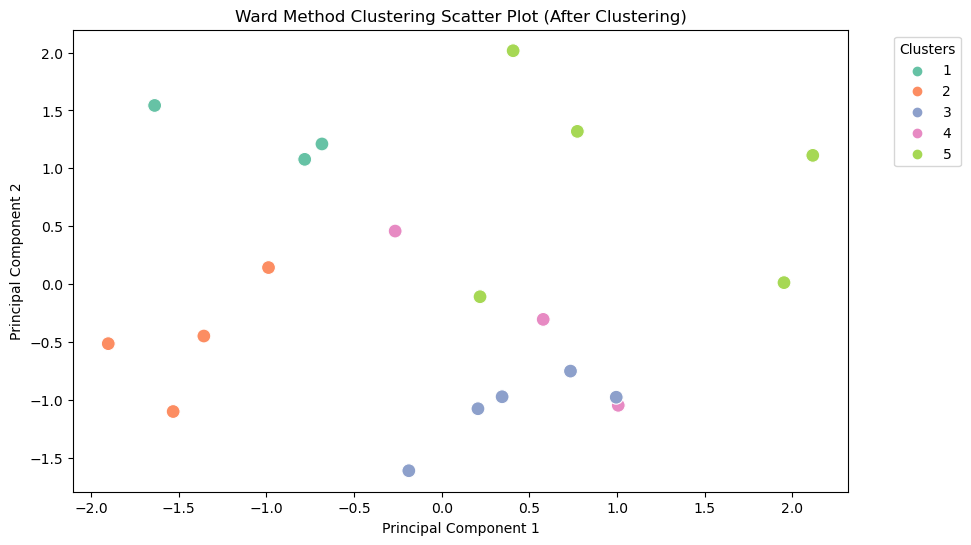

In [6]:
# Scatter plot after clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set2", s=100)
plt.title("Ward Method Clustering Scatter Plot (After Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# DENDOGRAM PLOTTING

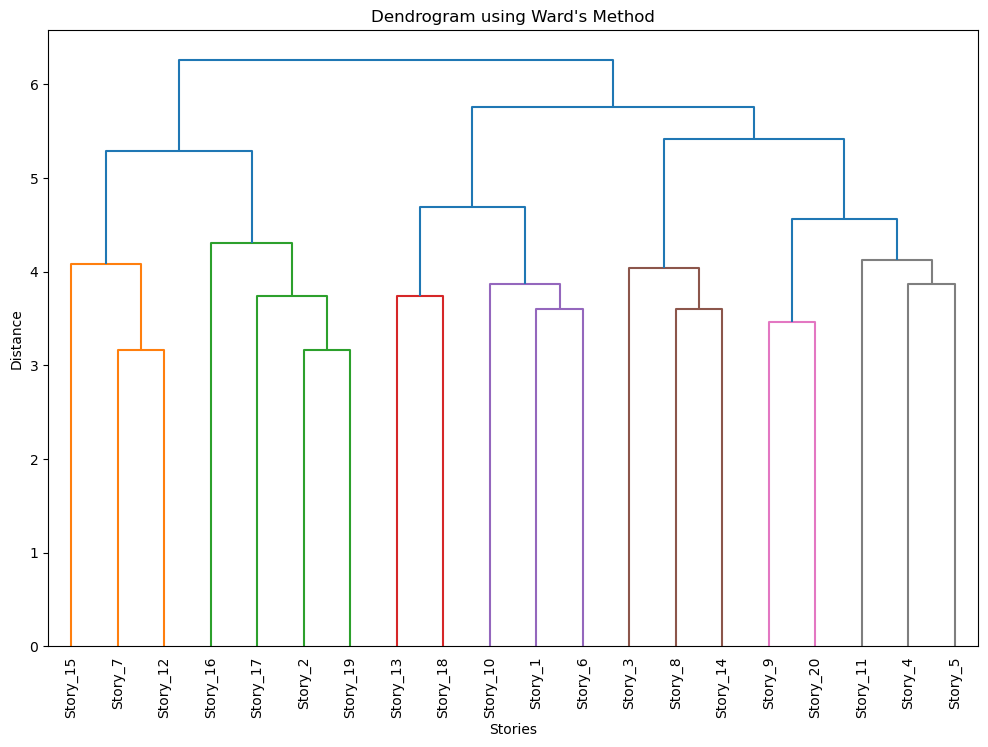

In [7]:
# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data["Story_ID"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram using Ward's Method")
plt.xlabel("Stories")
plt.ylabel("Distance")
plt.show()

# EVALUATING THE CLUSTERING RESULTS

In [8]:
# Evaluation metrics
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print("Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Save the clustering results
data.to_csv("jtbd_dataset_ward_results.csv", index=False)

Evaluation Metrics:
Silhouette Score: 0.07873530956921823
Calinski-Harabasz Score: 2.1397932248130225
